In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import pickle

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#sk

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#machine Learning
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
hec = pd.read_csv('phl_exoplanet_catalog.csv')
hec.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [3]:
planets = pd.read_csv('exoplanets.csv')
planets.head()


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,5/14/2014,2008-01,5/14/2014
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,7/23/2014,2011-08,7/23/2014
2,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,4/25/2018,2009-10,5/14/2014
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,9/4/2018,2017-03,9/6/2018
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,4/25/2018,2011-08,7/23/2014


In [4]:
planets.isnull().sum()


pl_name             0
hostname            0
default_flag        0
sy_snum             0
sy_pnum             0
                 ... 
sy_gaiamagerr1    600
sy_gaiamagerr2    600
rowupdate           1
pl_pubdate          0
releasedate         0
Length: 92, dtype: int64

In [5]:
target_count = hec['P_HABITABLE'].value_counts()
'''
0 --> not habitable
1 --> conservative
2 --> optimistic
'''
target_count

0    3993
2      34
1      21
Name: P_HABITABLE, dtype: int64

In [6]:
# drop not habitable planets
hec = hec[hec.P_HABITABLE != 0]

In [7]:
# create habitable column for planets data with the help of hec dataframe
# get names of planets
habitable_planets = hec.P_NAME.values
planets['habitable'] = planets['pl_name'].isin(habitable_planets)

In [8]:
target_count = planets['habitable'].value_counts()
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Percentage of Majority Class: {round(target_count[0] / sum(target_count), 4)*100}')
print(f'Percentage of Minority Class: {round(target_count[1] / sum(target_count), 4)*100}')

Class 0: 29331
Class 1: 346
Percentage of Majority Class: 98.83
Percentage of Minority Class: 1.17


In [9]:
# remove columns with more than 40% missing data
def remove_missing(f):
    count = len(planets[planets[f].isnull()])
    if count/len(planets) > 0.4:
        return 1
    else:
        return 0
    
missing_values = [x for x in planets.columns if remove_missing(x)]
planets = planets.drop(missing_values, axis=1)

In [10]:
planets.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmaxlim,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,29677.000000,29677.000000,29677.000000,29677.000000,29677.000000,2.691700e+04,2.603100e+04,2.603000e+04,26921.000000,18827.000000,...,28235.000000,29345.000000,29332.000000,29331.000000,29323.000000,29175.000000,29175.000000,29077.000000,29077.000000,29077.000000
mean,0.149409,1.079725,1.914614,2014.514742,0.001617,7.043570e+02,1.753710e+02,-1.672337e+02,-0.000223,-0.000159,...,-27.142584,13.799757,0.122418,-0.123324,11.783149,0.035182,-0.034638,13.569900,0.000524,-0.000524
std,0.356497,0.298566,1.206276,3.083720,0.040185,6.622335e+04,2.281722e+04,2.281121e+04,0.021112,0.012623,...,115.672302,2.321143,0.154699,0.193401,2.222954,0.178544,0.167672,2.250167,0.001164,0.001164
min,0.000000,1.000000,1.000000,1989.000000,0.000000,9.070629e-02,0.000000e+00,-3.650000e+06,-1.000000,-1.000000,...,-2900.000000,0.872000,0.001000,-12.270000,-3.044000,0.011000,-11.140000,2.926270,0.000122,-0.063232
25%,0.000000,1.000000,1.000000,2014.000000,0.000000,4.768310e+00,9.630000e-06,-2.157000e-04,0.000000,0.000000,...,-22.195000,12.991000,0.057000,-0.137000,11.151000,0.020000,-0.035000,12.835800,0.000254,-0.000506
50%,0.000000,1.000000,1.000000,2016.000000,0.000000,1.118720e+01,4.319000e-05,-4.318000e-05,0.000000,0.000000,...,-8.810000,14.358000,0.092000,-0.092000,12.395000,0.024000,-0.024000,14.175800,0.000352,-0.000352
75%,0.000000,1.000000,2.000000,2016.000000,0.000000,2.795000e+01,2.160000e-04,-9.650000e-06,0.000000,0.000000,...,-2.685000,15.322000,0.137000,-0.057000,13.214000,0.035000,-0.020000,15.105800,0.000506,-0.000254
max,1.000000,4.000000,8.000000,2021.000000,1.000000,8.040000e+06,3.650000e+06,0.000000e+00,1.000000,0.000000,...,2700.000000,45.340000,11.000000,-0.001000,35.330000,9.995000,-0.011000,20.186100,0.063232,-0.000122


In [11]:
# most planet numbers in a stellar system
planets['sy_pnum'].nlargest(10)

4524    8
4525    8
4526    8
4527    8
4528    8
4529    8
4530    8
4531    8
4532    8
4533    8
Name: sy_pnum, dtype: int64

<AxesSubplot:title={'center':'Class Count'}>

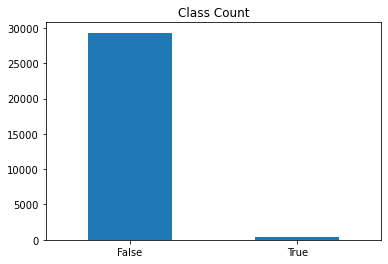

In [12]:
# target class's distribution
target_count = planets['habitable'].value_counts()
target_count.plot(kind='bar', title='Class Count', rot=0)

Text(0.5, 1.0, 'Temperature - Mass Relation with Habitability')

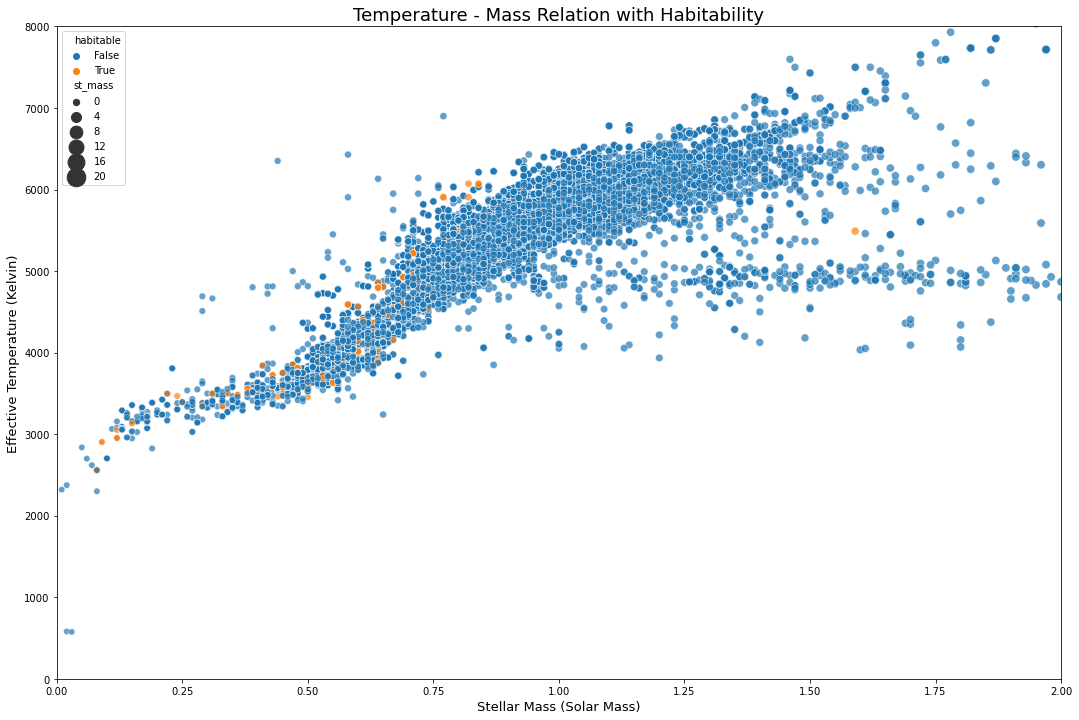

In [13]:
plt.figure(figsize=(18, 12))
ax = sns.scatterplot(x='st_mass', y='st_teff',
                     hue='habitable', size='st_mass',
                     sizes=(40, 400), alpha=.7,
                     data=planets)
# limiting x and y axis's values
ax.axis([0,2, 0, 8000])
ax.set_xlabel('Stellar Mass (Solar Mass)', fontsize=13)
ax.set_ylabel('Effective Temperature (Kelvin)', fontsize=13)
ax.set_title('Temperature - Mass Relation with Habitability', fontsize=18)

Text(0, 0.5, 'Dec [decimal degrees]')

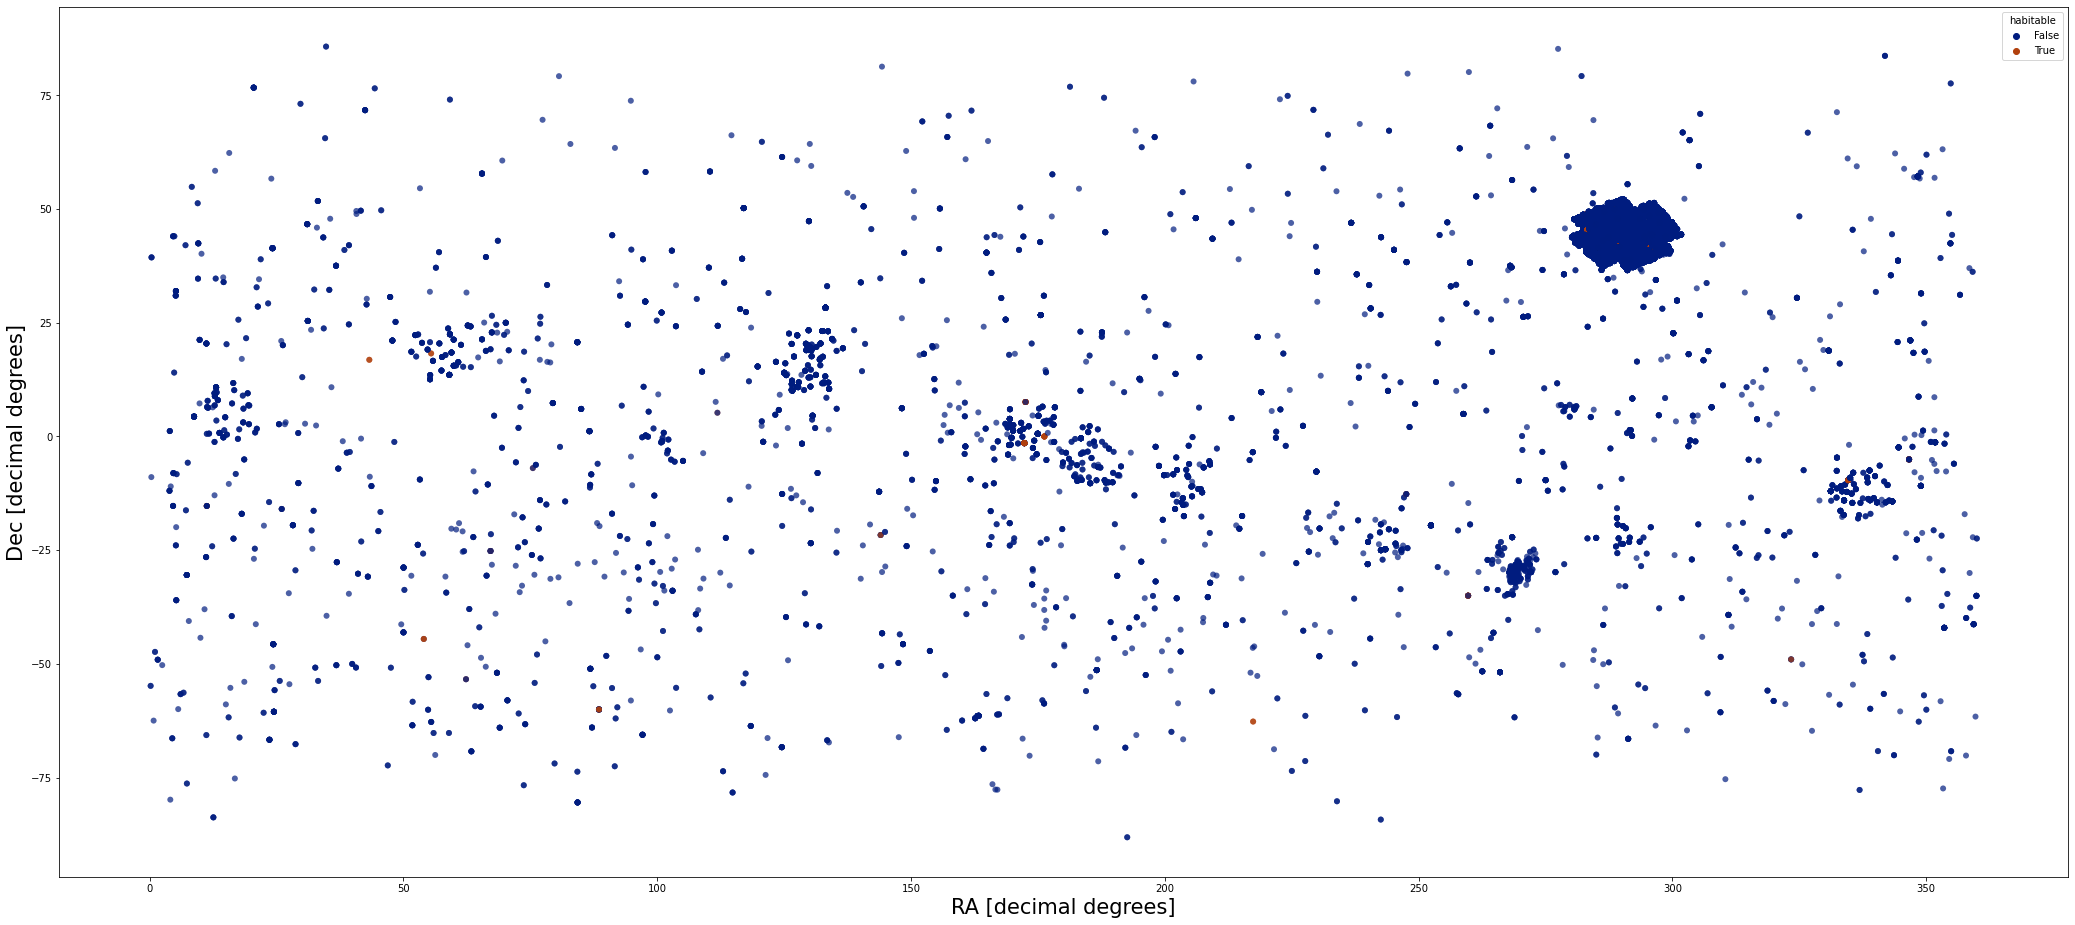

In [14]:
plt.figure(figsize=(36, 16))
sns.scatterplot(x="ra", y="dec",
                hue="habitable", alpha=.7,
                palette='dark', 
                sizes=(1, 8), linewidth=0,
                data=planets)
plt.xlabel('RA [decimal degrees]', fontsize=21)
plt.ylabel('Dec [decimal degrees]', fontsize=21)

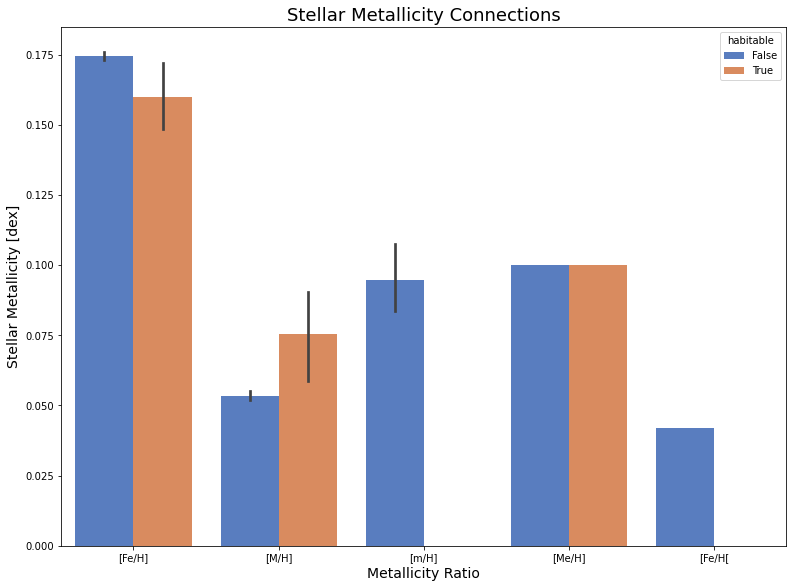

In [15]:
plt.figure(figsize=(13, 21))
plt.subplot(211)
m = sns.barplot(x="st_metratio", y="st_meterr1", hue="habitable", data=planets,
                palette="muted")
plt.xlabel('Metallicity Ratio', fontsize=14)
plt.ylabel('Stellar Metallicity [dex]', fontsize=14)
plt.title('Stellar Metallicity Connections', fontsize=18)


plt.show()

In [16]:
corr_mtrx = planets.corr()
corr_df = pd.DataFrame(corr_mtrx['habitable'].sort_values(ascending=False))
corr_df.head(10)

,habitable
habitable,1.000000
pl_controv_flag,0.167483
st_logg,0.085014
sy_vmagerr1,0.077766
sy_gaiamagerr1,0.062235
st_loggerr2,0.052526
sy_vmag,0.048072
sy_pnum,0.044381
sy_gaiamag,0.035404
st_tefferr2,0.027730


In [17]:
planets_c = planets[['sy_dist', 'habitable', 'st_mass']]
planets_c.drop(planets_c[planets_c.habitable != 1].index, inplace=True)

In [18]:
planets_c['dist_to_star_ly'] = planets_c['sy_dist'] * 3.26
"""
The Voyager 1 spacecraft is on an interstellar mission. It is traveling away from the Sun at a rate of 17.3 km/s. It means
62280 km/h. 
1 light year = 9.4605284 × 10^12 kilometers
1 year = 8760 hours
1 speed of light = 1079252848.8 km/h
""" 
planets_c['minimum_travel_time_year'] = (((planets_c['dist_to_star_ly'] * 9.461e12) / 62280) / 8760)
planets_c.head()

,sy_dist,habitable,st_mass,dist_to_star_ly,minimum_travel_time_year
379,3.672780,True,0.12,11.973263,2.076332e+05
380,3.672780,True,0.12,11.973263,2.076332e+05
418,15.128500,True,NaN,49.318910,8.552593e+05
432,5.921535,True,0.29,19.304204,3.347621e+05
452,20.190300,True,0.42,65.820378,1.141418e+06


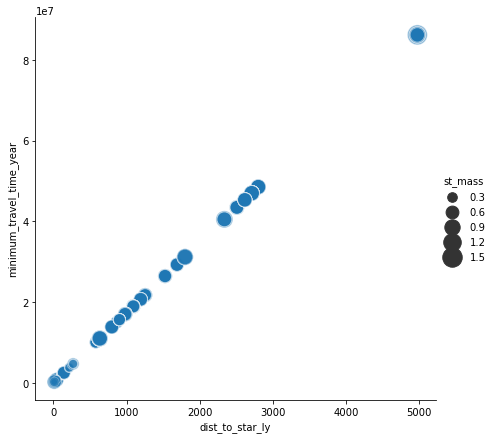

In [19]:
sns.relplot(x="dist_to_star_ly", y="minimum_travel_time_year", size="st_mass",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=planets_c)

In [20]:

planets_c = planets.copy()


In [21]:
planets_c[['pl_rade', 'pl_orbper']] = planets[['pl_rade', 'pl_orbper']]

# Reorder columns
planets_c = planets_c[[ 'pl_rade', 'pl_orbper', 'st_teff',
                       'st_mass', 'st_rad', 'st_met', 'st_logg', 
                        'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'habitable']]

planets_c.describe()


,pl_rade,pl_orbper,st_teff,st_mass,st_rad,st_met,st_logg,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,20836.000000,2.691700e+04,27975.000000,25227.000000,28084.000000,18960.000000,24521.000000,29077.000000,29077.000000,29077.000000
mean,4.727759,7.043570e+02,5468.334439,0.945506,1.142886,-0.030804,4.413511,13.569900,0.000524,-0.000524
std,58.445336,6.622335e+04,1000.040454,0.319634,1.722876,0.226288,0.285306,2.250167,0.001164,0.001164
min,0.270000,9.070629e-02,575.000000,0.000000,0.010000,-2.500000,1.100000,2.926270,0.000122,-0.063232
25%,1.550000,4.768310e+00,5106.000000,0.820000,0.790000,-0.160000,4.320000,12.835800,0.000254,-0.000506
50%,2.260000,1.118720e+01,5613.000000,0.960000,0.950000,-0.019000,4.470000,14.175800,0.000352,-0.000352
75%,3.154750,2.795000e+01,5949.920000,1.070000,1.200000,0.120000,4.570000,15.105800,0.000506,-0.000254
max,3791.050000,8.040000e+06,57000.000000,23.560000,83.800000,0.740000,7.920000,20.186100,0.063232,-0.000122


In [22]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE, ADASYN


frames = [planets_c, corr_df]
planets_d = pd.concat(frames)


0.8.0


In [23]:
planets_c = planets_c.dropna()
planets_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13388 entries, 94 to 29640
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pl_rade         13388 non-null  float64
 1   pl_orbper       13388 non-null  float64
 2   st_teff         13388 non-null  float64
 3   st_mass         13388 non-null  float64
 4   st_rad          13388 non-null  float64
 5   st_met          13388 non-null  float64
 6   st_logg         13388 non-null  float64
 7   sy_gaiamag      13388 non-null  float64
 8   sy_gaiamagerr1  13388 non-null  float64
 9   sy_gaiamagerr2  13388 non-null  float64
 10  habitable       13388 non-null  bool   
dtypes: bool(1), float64(10)
memory usage: 1.1 MB


In [24]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
X_train, X_test, y_train, y_test = train_test_split(planets_c.iloc[:, :-1], planets_c.loc[:, 'habitable'], test_size=0.25,random_state=76)
X_train.shape # shape of my train set

(10041, 10)

In [25]:
# Resampling imbalanced data
X_smoted, y_smoted = SMOTE(sampling_strategy='minority', random_state=76).fit_resample(X_train, y_train)

In [26]:
X_smoted.shape

(19840, 10)

<AxesSubplot:>

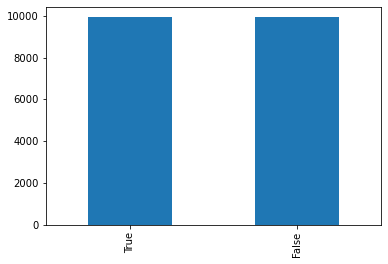

In [27]:
# observe that data has been balanced
pd.Series(y_smoted).value_counts().plot.bar()

In [28]:
# list to contain model and accuracy values
eva_list = []
# to contain model names
models = []

In [29]:
xgboost = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

xgboost.fit(X_smoted, y_smoted)
y_predx = xgboost.predict(X_test)

xg_acc = round(xgboost.score(X_smoted, y_smoted) * 100, 2)
xg_acc_test = round(accuracy_score(y_test, y_predx) * 100, 2)

print(f'Train Accuracy Score of Hard VotingClassifier: % {xg_acc}')
print(f'Test Accuracy Score of Hard VotingClassifier: % {xg_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_predx, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

[02:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Score of Hard VotingClassifier: % 99.54
Test Accuracy Score of Hard VotingClassifier: % 99.19
Precision : 0.763157894736842
Recall    : 0.9959300572806753
F1-score   : 0.8427842987844658


In [30]:
eva_list.append(dict([
    ('Model', 'XGBoost'),
    ('Train Accuracy', round(xg_acc, 2)),
    ('Test Accuracy', round(xg_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [31]:
results = pd.DataFrame(data=eva_list)
results = results[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Recall', ascending=False)
results = results.set_index('Model')
results

,Train Accuracy,Test Accuracy,Precision,Recall,F1
Model,,,,,
XGBoost,99.54,99.19,0.76,1.0,0.84


Text(0.5, 1.0, 'Habitability/Number of planets in relation to the Stellar Mass')

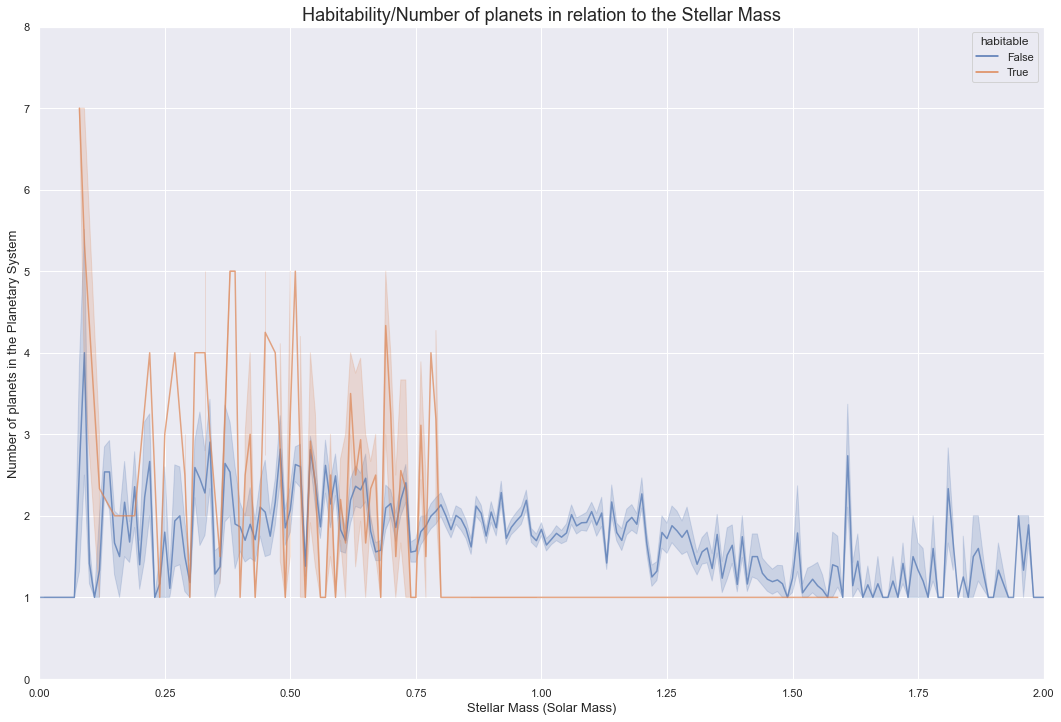

In [69]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 12))
ax = sns.lineplot(x='st_mass', y='sy_pnum',
                     hue='habitable',
                      alpha=.7,
                     data=planets)
# limiting x and y axis's values
ax.axis([0, 2, 0, 8])
ax.set_xlabel('Stellar Mass (Solar Mass)', fontsize=13)
ax.set_ylabel('Number of planets in the Planetary System', fontsize=13)
ax.set_title('Habitability/Number of planets in relation to the Stellar Mass', fontsize=18)

Text(0.5, 1.0, 'Number of planets in a Planetary System in relation to their distance from us')

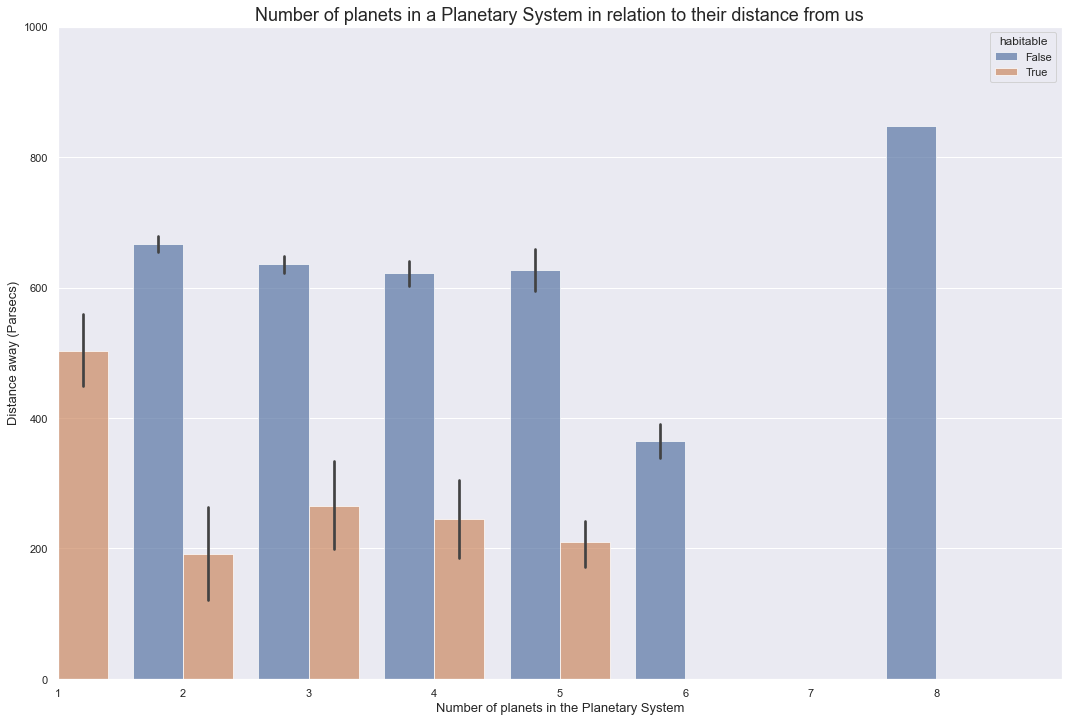

In [68]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 12))
ax = sns.barplot(x='sy_pnum', y='sy_dist',
                     hue='habitable',
                      alpha=.7,
                     data=planets)
# limiting x and y axis's values
ax.axis([0, 8, 0, 1000])
ax.set_xlabel('Number of planets in the Planetary System', fontsize=13)
ax.set_ylabel('Distance away (Parsecs)', fontsize=13)
ax.set_title('Number of planets in a Planetary System in relation to their distance from us', fontsize=18)

Text(0.5, 1.0, 'Habitablity and Number of Stars/Planets in Planetary Systems')

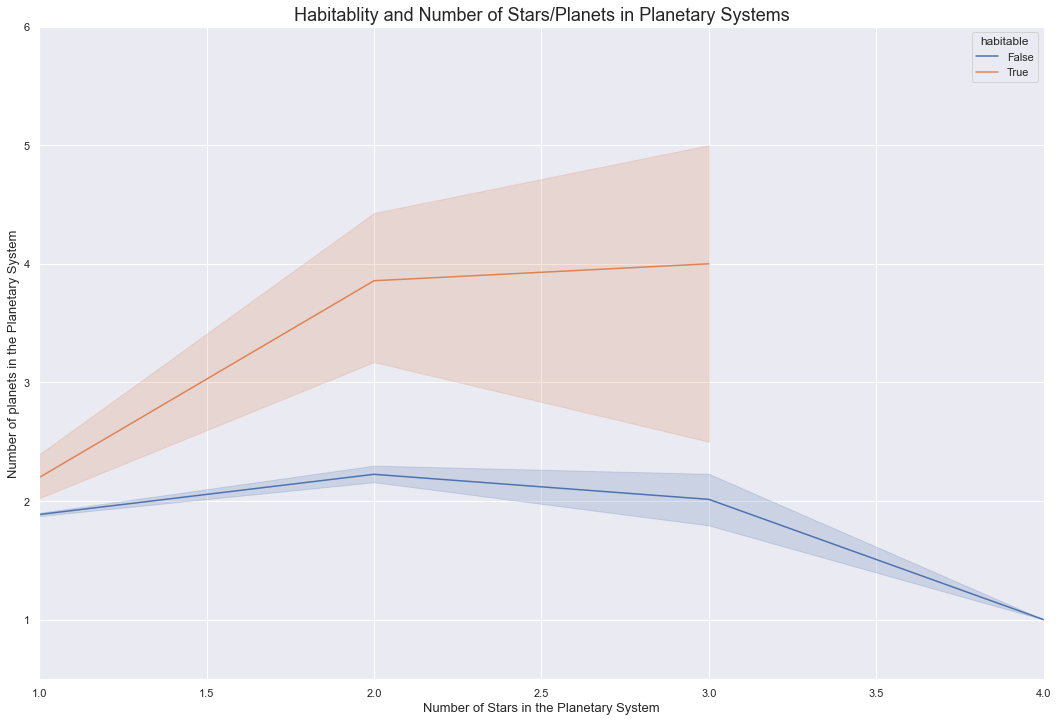

In [106]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18, 12))
ax = sns.lineplot(x='sy_snum', y='sy_pnum',
                     hue='habitable',
                      
                     data=planets)
# limiting x and y axis's values
ax.axis([1, 4, 0.5, 6])
ax.set_xlabel('Number of Stars in the Planetary System', fontsize=13)
ax.set_ylabel('Number of planets in the Planetary System', fontsize=13)
ax.set_title('Habitablity and Number of Stars/Planets in Planetary Systems', fontsize=18)